In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import pearsonr
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from scipy.sparse import csr_matrix

In [4]:
wine = pd.read_csv("wine.csv")
wine.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
samples = wine[['total_phenols', 'od280']].values

In [14]:
model = PCA()
model.fit(samples)
transformed = model.transform(samples)
print(model.components_)
transformed

[[-0.64116665 -0.76740167]
 [-0.76740167  0.64116665]]


array([[-1.32771994e+00,  4.51396070e-01],
       [-8.32496068e-01,  2.33099664e-01],
       [-7.52168680e-01, -2.94789161e-02],
       [-1.64026613e+00, -6.55724013e-01],
       [-5.67992278e-01, -1.83358911e-01],
       [-8.07948468e-01, -5.95331030e-01],
       [-8.74453372e-01,  4.63619912e-01],
       [-9.38570037e-01,  3.86879744e-01],
       [-5.06600144e-01, -2.34652243e-01],
       [-1.15919131e+00,  7.60321086e-02],
       [-8.48343677e-01, -1.44589167e-01],
       [-9.88781053e-02,  2.06553762e-01],
       [-4.16736898e-01, -4.91135760e-02],
       [-6.06861937e-01, -5.41812743e-01],
       [-9.42293719e-01, -5.22178083e-01],
       [-5.61680527e-01, -2.53787328e-01],
       [-3.53119809e-01, -3.62885573e-01],
       [-3.87902672e-01, -5.29289156e-01],
       [-8.04161418e-01, -6.37588080e-01],
       [-8.33858333e-01,  1.69082914e-01],
       [-1.29479891e+00,  1.63270739e-01],
       [-7.70704274e-01,  4.94216064e-01],
       [-1.26729041e+00,  6.48495720e-01],
       [-9.

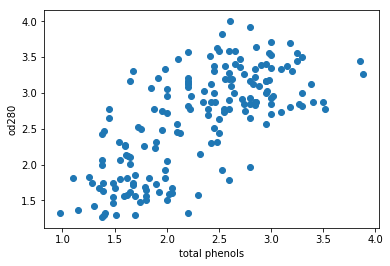

In [12]:
plt.scatter(wine['total_phenols'], wine['od280'])
plt.xlabel('total phenols')
plt.ylabel('od280')
plt.show()

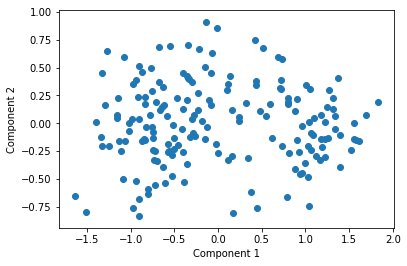

In [15]:
plt.scatter(transformed[:,0], transformed[:,1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

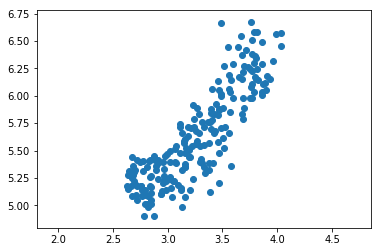

0.8604149377143467


In [18]:
grains = pd.read_csv("seeds-width-vs-length.csv", header=None).values
width = grains[:, 0]

# Assign the 1st column of grains: length
length = grains[:, 1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlatio
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)

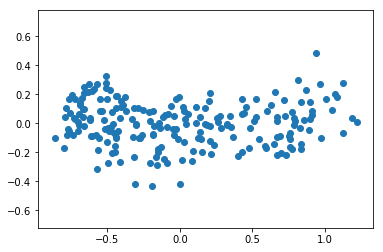

7.474656899453042e-17


In [19]:
# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

In [21]:
iris = datasets.load_iris()
print(iris.keys())
iris.target_names, iris.feature_names

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [28]:
irisDf = pd.DataFrame(iris.data)
irisDf.columns = iris.feature_names
versicolor = irisDf[iris.data == 1][['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)']].values
versicolor

array([[4.6, 3.6, 0.2],
       [4.9, 2.4, 1. ],
       [5. , 2. , 1. ],
       [6. , 2.2, 1. ],
       [5.8, 2.7, 1. ],
       [5.7, 2.6, 1. ],
       [5.5, 2.4, 1. ],
       [5. , 2.3, 1. ]])

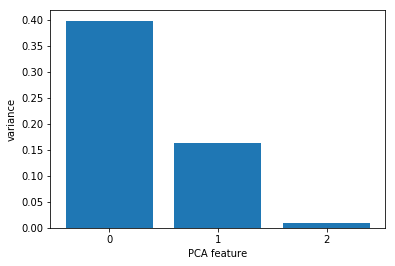

In [30]:
pca = PCA()
pca.fit(versicolor)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

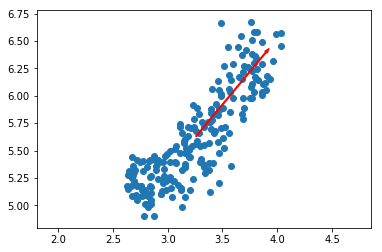

In [31]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)
# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0, :]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

In [33]:
fish = pd.read_csv('fish.csv', header=None).values[:, 1:7].astype(float)
fish.shape

(85, 6)

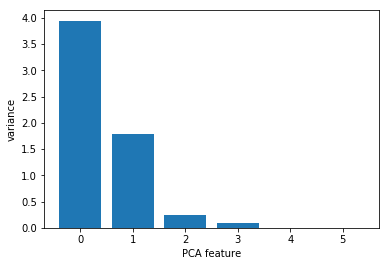

In [34]:
# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'fish'
pipeline.fit(fish)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

(150, 2)


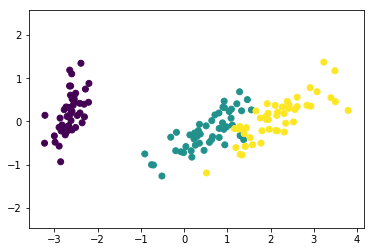

In [37]:
pca = PCA(n_components=2)
pca.fit(iris.data)
transformed = pca.transform(iris.data)
print(transformed.shape)
xs = transformed[:,0]
ys = transformed[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys, c=iris.target)
plt.axis('equal')
plt.show()

In [39]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']
# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


In [41]:
# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

In [46]:
wikiDf = pd.read_csv("wikipedia-vectors.csv")
wikiDf

,Unnamed: 0,HTTP 404,Alexa Internet,Internet Explorer,HTTP cookie,Google Search,Tumblr,Hypertext Transfer Protocol,Social search,Firefox,...,Chad Kroeger,Nate Ruess,The Wanted,Stevie Nicks,Arctic Monkeys,Black Sabbath,Skrillex,Red Hot Chili Peppers,Sepsis,Adam Levine
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.008878,0.000000,0.000000,0.049502,0.000000,0.000000,0.000000
1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006110,0.000000
2,2,0.000000,0.029607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005646,0.000000,0.000000
4,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,7,0.000000,0.000000,0.003772,0.000000,0.000000,0.000000,0.000000,0.000000,0.031222,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004690,0.000000,0.000000
8,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.003638,0.000000,0.000000,0.000000,0.000000


In [57]:
articles = csr_matrix(np.transpose(wikiDf.values[:, 1:]))
articles

<60x13125 sparse matrix of type '<class 'numpy.float64'>'
	with 42091 stored elements in Compressed Sparse Row format>

In [62]:
titles = wikiDf.columns.values.astype(str)[1:]
titles

array(['HTTP 404', 'Alexa Internet', 'Internet Explorer', 'HTTP cookie',
       'Google Search', 'Tumblr', 'Hypertext Transfer Protocol',
       'Social search', 'Firefox', 'LinkedIn', 'Global warming',
       'Nationally Appropriate Mitigation Action', 'Nigel Lawson',
       'Connie Hedegaard', 'Climate change', 'Kyoto Protocol', '350.org',
       'Greenhouse gas emissions by the United States',
       '2010 United Nations Climate Change Conference',
       '2007 United Nations Climate Change Conference', 'Angelina Jolie',
       'Michael Fassbender', 'Denzel Washington', 'Catherine Zeta-Jones',
       'Jessica Biel', 'Russell Crowe', 'Mila Kunis', 'Dakota Fanning',
       'Anne Hathaway', 'Jennifer Aniston',
       'France national football team', 'Cristiano Ronaldo',
       'Arsenal F.C.', 'Radamel Falcao', 'Zlatan Ibrahimović',
       'Colombia national football team',
       '2014 FIFA World Cup qualification', 'Football', 'Neymar',
       'Franck Ribéry', 'Tonsillitis', 'Hepatiti

In [63]:

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))

    label                                        article
59      0                                    Adam Levine
57      0                          Red Hot Chili Peppers
56      0                                       Skrillex
55      0                                  Black Sabbath
54      0                                 Arctic Monkeys
53      0                                   Stevie Nicks
52      0                                     The Wanted
51      0                                     Nate Ruess
50      0                                   Chad Kroeger
58      0                                         Sepsis
40      1                                    Tonsillitis
41      1                                    Hepatitis B
42      1                                    Doxycycline
43      1                                       Leukemia
47      1                                          Fever
45      1                                    Hepatitis C
46      1                      